<a href="https://colab.research.google.com/github/Rothy-0x/PA-Datmin/blob/main/Salinan_dari_Data_Mining_%7C_Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CRISP-DM (Supervised Learning)

## Analisis Tren Penjualan Walmart





## Business Understanding


Goals Walmart:

Sebagai perusahaan ritel terbesar di dunia, Walmart memiliki beberapa tujuan utama dalam bisnisnya, antara lain:

1. Meningkatkan penjualan: Walmart ingin meningkatkan penjualan di seluruh toko dan secara keseluruhan, dengan mengidentifikasi produk yang paling laris dan mempromosikan produk-produk tersebut dengan lebih efektif.

2. Meningkatkan profitabilitas: Walmart ingin meningkatkan profitabilitasnya dengan mengurangi biaya operasional dan meningkatkan efisiensi di seluruh rantai pasokan.

3. Meningkatkan kepuasan pelanggan: Walmart ingin memastikan bahwa pelanggan memiliki pengalaman belanja yang positif dan konsisten di seluruh toko.

Tujuan Penggunaan Data Mining

Data mining dapat digunakan untuk mengidentifikasi tren penjualan di seluruh toko dan untuk memprediksi penjualan di masa depan. Hal ini dapat membantu Walmart untuk memutuskan produk mana yang harus dipromosikan dan kapan.

## Data Understanding

##### Collect Data

In [ ]:
import pandas as pd

df = pd.read_csv("https://raw.githubusercontent.com/hadiprasetiyo/dataset-data-mining/main/Walmart_Store_sales.csv")

df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667


##### Describe Data

In [ ]:
df.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


1. count: menunjukkan jumlah nilai non-null dalam setiap kolom dataset.

2. mean: menunjukkan nilai rata-rata dari setiap kolom dataset.

3. std: menunjukkan standar deviasi dari setiap kolom dataset.

3. min: menunjukkan nilai minimum dari setiap kolom dataset.

4. 25%: menunjukkan kuartil pertama dari setiap kolom dataset, kuartil pertama adalah nilai yang membagi dataset menjadi dua bagian yang sama besar.

5. 50%: menunjukkan kuartil kedua dari setiap kolom dataset, kuartil kedua atau median adalah nilai tengah dari dataset.

6. 75%: menunjukkan kuartil ketiga dari setiap kolom dataset, kuartil ketiga adalah nilai yang membagi dataset menjadi dua bagian yang sama besar.

7. max: menunjukkan nilai maksimum dari setiap kolom dataset.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


1. Store: Nomor identifikasi toko Walmart

2. Date: Tanggal penjualan dalam format YYYY-MM-DD

3. Weekly_Sales: Total penjualan mingguan pada toko tertentu

4. Holiday_Flag: Menandakan apakah minggu itu adalah minggu libur nasional (1) atau bukan (0)

5. Temperature: Suhu rata-rata di wilayah toko pada minggu tersebut dalam skala Fahrenheit

6. Fuel_Price: Harga rata-rata bahan bakar di wilayah toko pada minggu tersebut

7. CPI: Indeks Harga Konsumen pada minggu tersebut

8. Unemployment: Tingkat pengangguran pada minggu tersebut di wilayah toko.

##### Eksplore Data

In [ ]:
import plotly.express as px
import seaborn as sns

In [ ]:
df[df.duplicated()]

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment


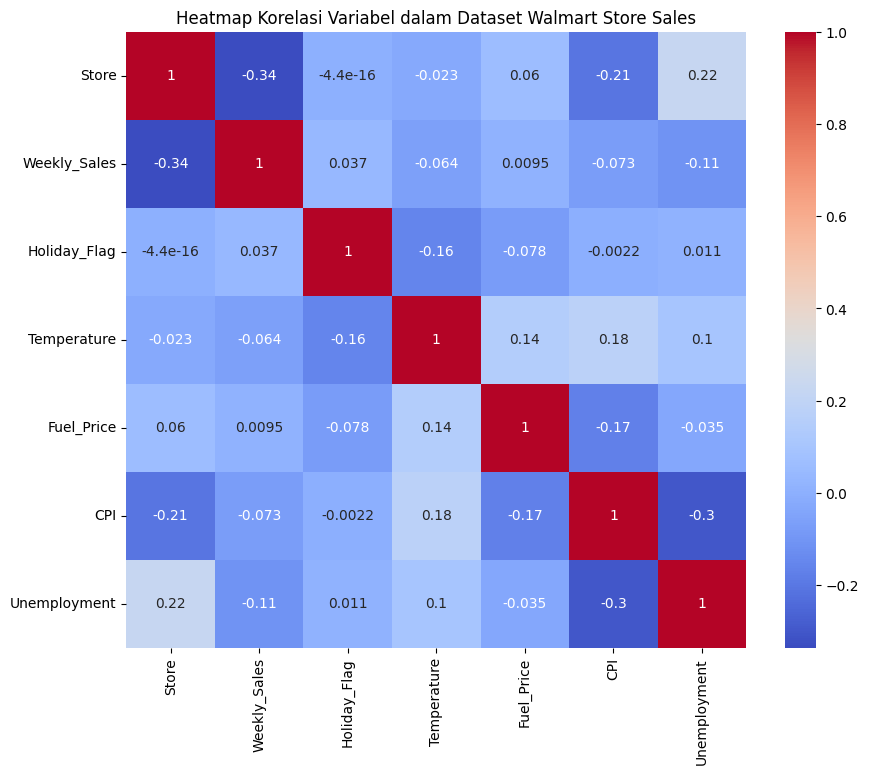

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# membuat matriks korelasi
corr_matrix = df.corr(numeric_only=True)

# membuat heatmap korelasi
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Heatmap Korelasi Variabel dalam Dataset Walmart Store Sales')
plt.show()


Toko mana yang memiliki penjualan minimum dan maksimum?

<class 'numpy.float64'>


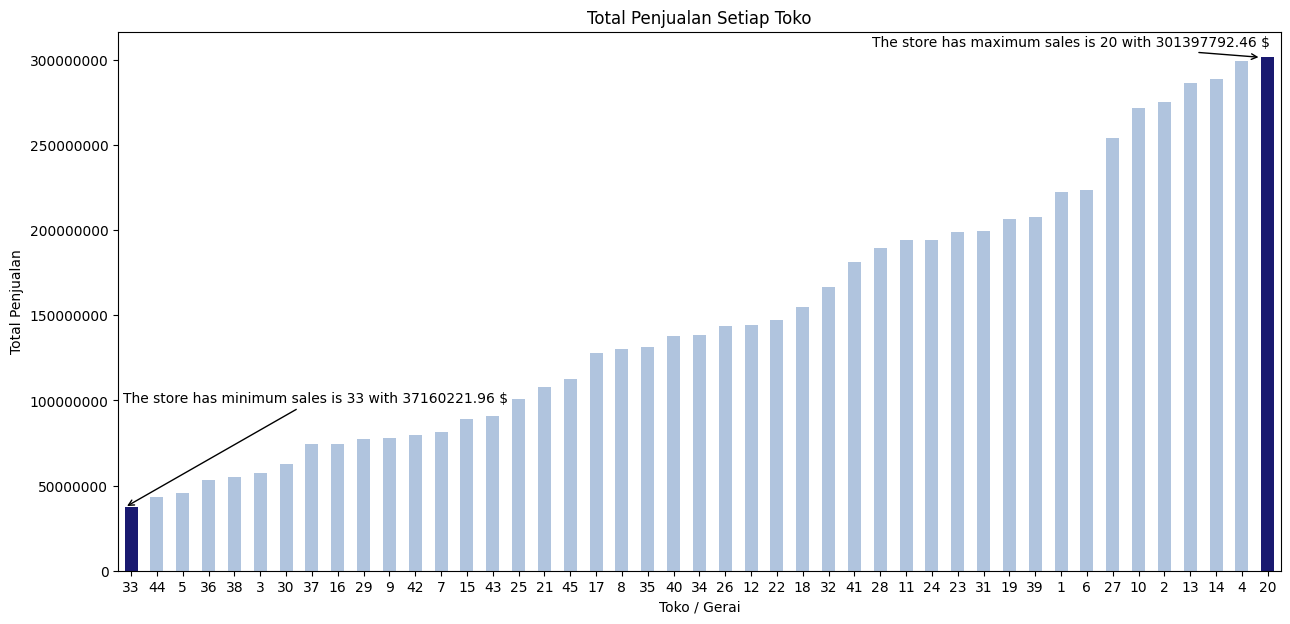

In [ ]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import dates

plt.figure(figsize=(15,7))

# Sum Weekly_Sales for each store, then sortded by total sales
total_sales_for_each_store = df.groupby('Store')['Weekly_Sales'].sum().sort_values() 
total_sales_for_each_store_array = np.array(total_sales_for_each_store) # convert to array

# Assigning a specific color for the stores have the lowest and highest sales
clrs = ['lightsteelblue' if ((x < max(total_sales_for_each_store_array)) and (x > min(total_sales_for_each_store_array))) else 'midnightblue' for x in total_sales_for_each_store_array]


ax = total_sales_for_each_store.plot(kind='bar',color=clrs);

# store have minimum sales
p = ax.patches[0]
print(type(p.get_height()))
ax.annotate("The store has minimum sales is 33 with {0:.2f} $".format((p.get_height())), xy=(p.get_x(), p.get_height()), xycoords='data',
            xytext=(0.17, 0.32), textcoords='axes fraction',
            arrowprops=dict(arrowstyle="->", connectionstyle="arc3"),
            horizontalalignment='center', verticalalignment='center')


# store have maximum sales 
p = ax.patches[44]
ax.annotate("The store has maximum sales is 20 with {0:.2f} $".format((p.get_height())), xy=(p.get_x(), p.get_height()), xycoords='data',
            xytext=(0.82, 0.98), textcoords='axes fraction',
            arrowprops=dict(arrowstyle="->", connectionstyle="arc3"),
            horizontalalignment='center', verticalalignment='center')


# plot properties
plt.xticks(rotation=0)
plt.ticklabel_format(useOffset=False, style='plain', axis='y')
plt.title('Total Penjualan Setiap Toko')
plt.xlabel('Toko / Gerai')
plt.ylabel('Total Penjualan');

<ipython-input-65-5837415eb878>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['Store'] == df_std.head(1).index[0]]['Weekly_Sales'])


Text(0.5, 1.0, 'The Sales Distribution of Store #14')

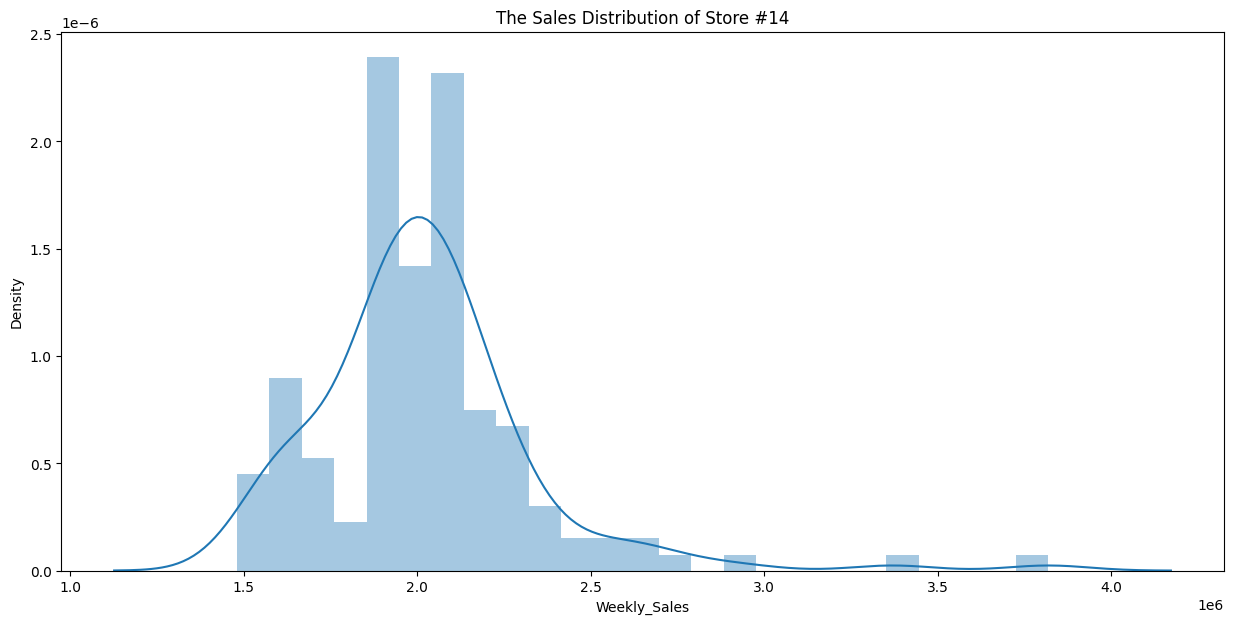

In [ ]:
df_std = pd.DataFrame(df.groupby('Store')['Weekly_Sales'].std().sort_values(ascending=False))

plt.figure(figsize=(15,7))
sns.distplot(df[df['Store'] == df_std.head(1).index[0]]['Weekly_Sales'])
plt.title('The Sales Distribution of Store #'+ str(df_std.head(1).index[0]))

Visualisasi tersebut memberikan gambaran tentang variasi dan pola penjualan di toko dengan standar deviasi tertinggi dalam dataset Walmart Store Sales. Dari visualisasi tersebut, kita dapat melihat bahwa penjualan di toko tersebut tidak stabil dan terkonsentrasi pada kisaran tertentu, yang dapat membantu dalam pengambilan keputusan bisnis terkait manajemen persediaan dan promosi penjualan. Namun, untuk kesimpulan yang lebih akurat, perlu dilakukan analisis lebih lanjut.

## Data Preparation

In [ ]:
df.sample(10)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
5223,37,15-07-2011,498749.62,0,85.63,3.575,214.108365,8.177
232,2,21-10-2011,1834680.25,0,64.53,3.353,217.165004,7.441
5854,41,31-08-2012,1360517.52,0,71.56,3.556,198.096734,6.432
4336,31,24-12-2010,2068942.97,0,51.29,2.886,211.064660,8.163
3883,28,09-07-2010,1340293.87,0,90.37,3.100,126.151800,14.180
4976,35,13-04-2012,788633.42,0,52.22,4.044,141.843393,8.876
1914,14,25-02-2011,1875708.88,0,35.78,3.274,184.162563,8.549
3520,25,14-10-2011,646915.47,0,58.95,3.541,210.402760,7.082
5332,38,19-11-2010,348593.99,0,58.18,3.161,126.607200,14.313
4038,29,01-10-2010,474698.01,0,69.31,2.717,132.756800,10.524


##### Missing Value Check

In [ ]:
df.isna().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

###### Merubah tipe data Date dari float menjadi datetime

In [ ]:
# Convert date to datetime format and show dataset information
df['Date'] =  pd.to_datetime(df['Date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6435 non-null   int64         
 1   Date          6435 non-null   datetime64[ns]
 2   Weekly_Sales  6435 non-null   float64       
 3   Holiday_Flag  6435 non-null   int64         
 4   Temperature   6435 non-null   float64       
 5   Fuel_Price    6435 non-null   float64       
 6   CPI           6435 non-null   float64       
 7   Unemployment  6435 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(2)
memory usage: 402.3 KB


<ipython-input-68-e50ed92459c1>:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['Date'] =  pd.to_datetime(df['Date'])


In [ ]:
# Splitting Date and create new columns (Day, Month, and Year)
df["Day"]= pd.DatetimeIndex(df['Date']).day
df['Month'] = pd.DatetimeIndex(df['Date']).month
df['Year'] = pd.DatetimeIndex(df['Date']).year
df.sample(1)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Day,Month,Year
1991,14,2012-08-17,1660433.3,0,75.71,3.807,191.228492,8.684,17,8,2012


##### Koefesien Penjualan

In [ ]:
coef_mean_std = pd.DataFrame(df.groupby('Store')['Weekly_Sales'].std() / df.groupby('Store')['Weekly_Sales'].mean())
coef_mean_std = coef_mean_std.rename(columns={'Weekly_Sales':'Coefficient of mean to standard deviation'})
coef_mean_std

,Coefficient of mean to standard deviation
Store,
1,0.100292
2,0.123424
3,0.115021
4,0.127083
5,0.118668
6,0.135823
7,0.197305
8,0.116953
9,0.126895


##### Distribusi Penjualan Setiap Toko / Gerai

<ipython-input-71-5274771def40>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['Store'] == coef_mean_std_max.tail(1).index[0]]['Weekly_Sales'])


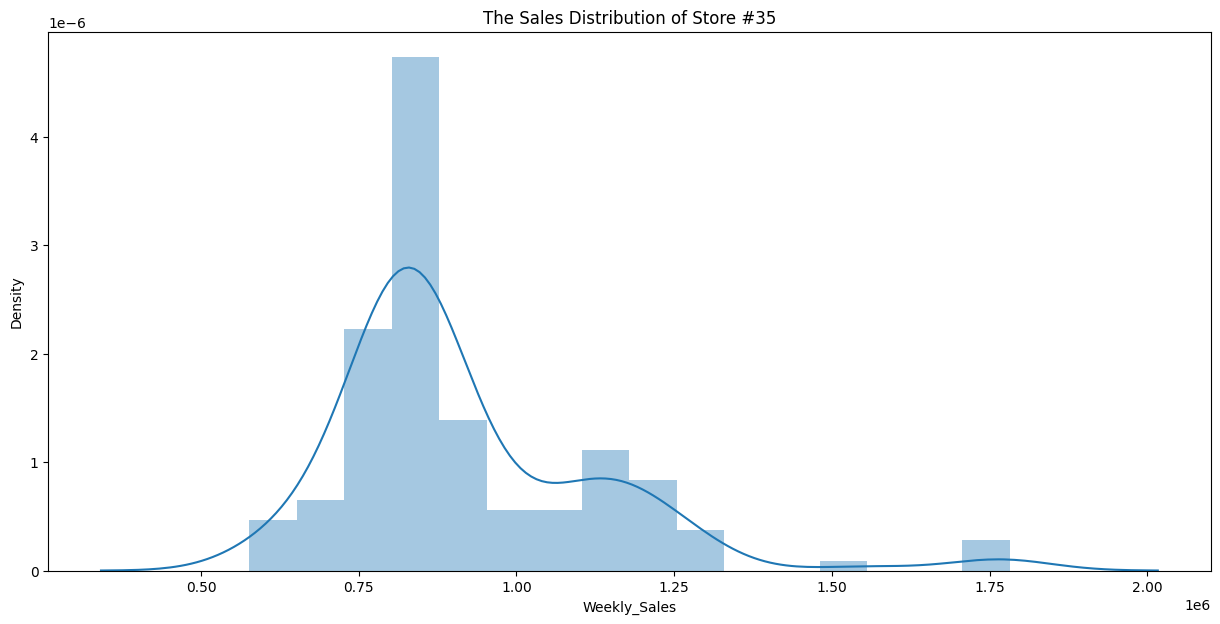

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

coef_mean_std_max = coef_mean_std.sort_values(by='Coefficient of mean to standard deviation')
plt.figure(figsize=(15,7))
sns.distplot(df[df['Store'] == coef_mean_std_max.tail(1).index[0]]['Weekly_Sales'])
plt.title('The Sales Distribution of Store #'+str(coef_mean_std_max.tail(1).index[0]));

In [ ]:
plt.figure(figsize=(15,7))

# Sales for third quarterly in 2012
Q3 = df[(df['Date'] > '2012-07-01') & (df['Date'] < '2012-09-30')].groupby('Store')['Weekly_Sales'].sum()

# Sales for second quarterly in 2012
Q2 = df[(df['Date'] > '2012-04-01') & (df['Date'] < '2012-06-30')].groupby('Store')['Weekly_Sales'].sum()

print('Store have good quarterly growth rate in Q3’2012 is Store '+str(Q3.idxmax())+' With '+str(Q3.max())+' $')

Store have good quarterly growth rate in Q3’2012 is Store 4 With 25652119.35 $


<Figure size 1500x700 with 0 Axes>

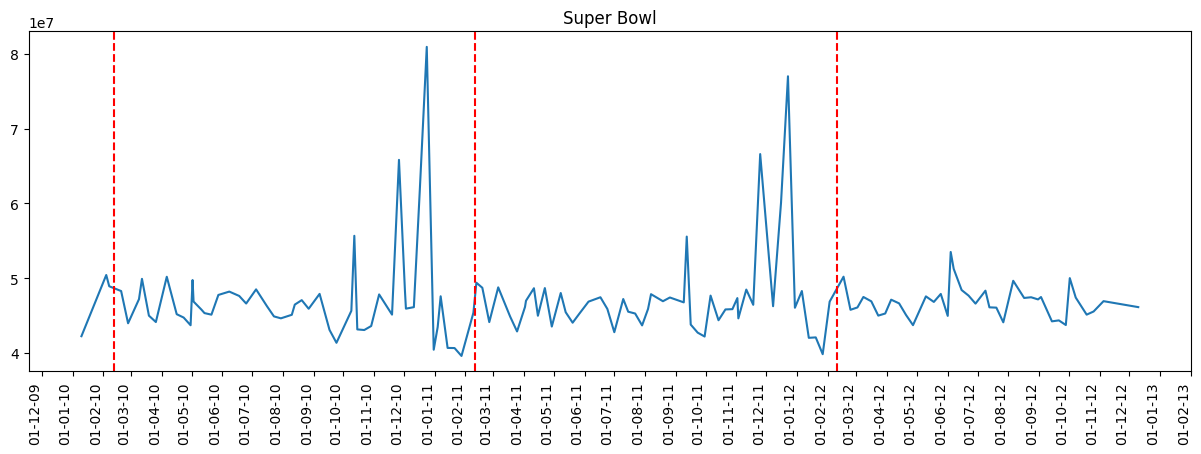

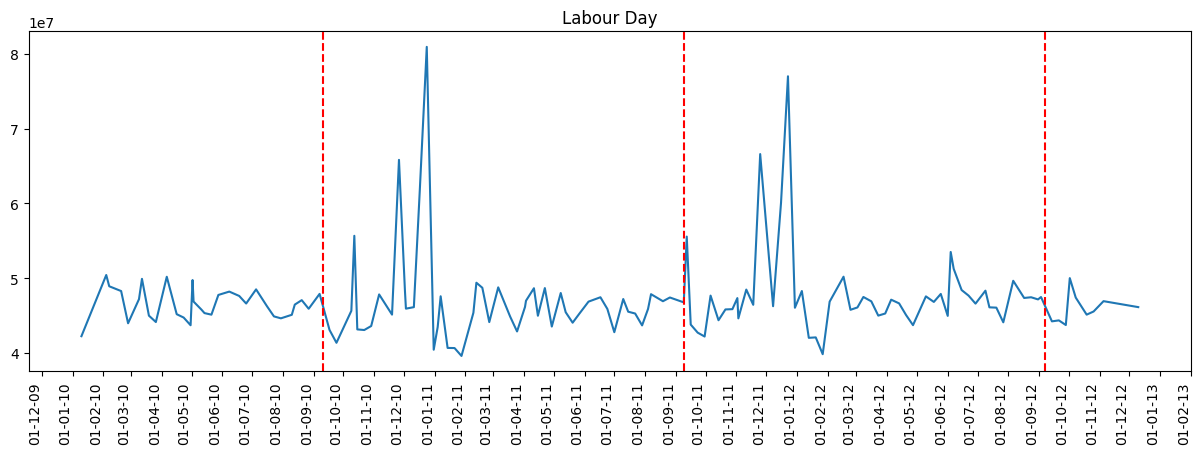

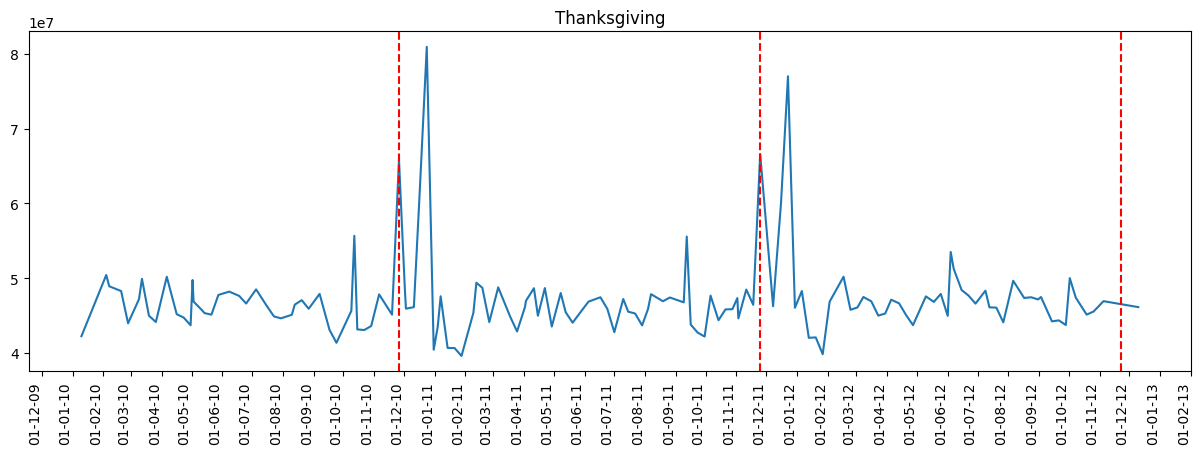

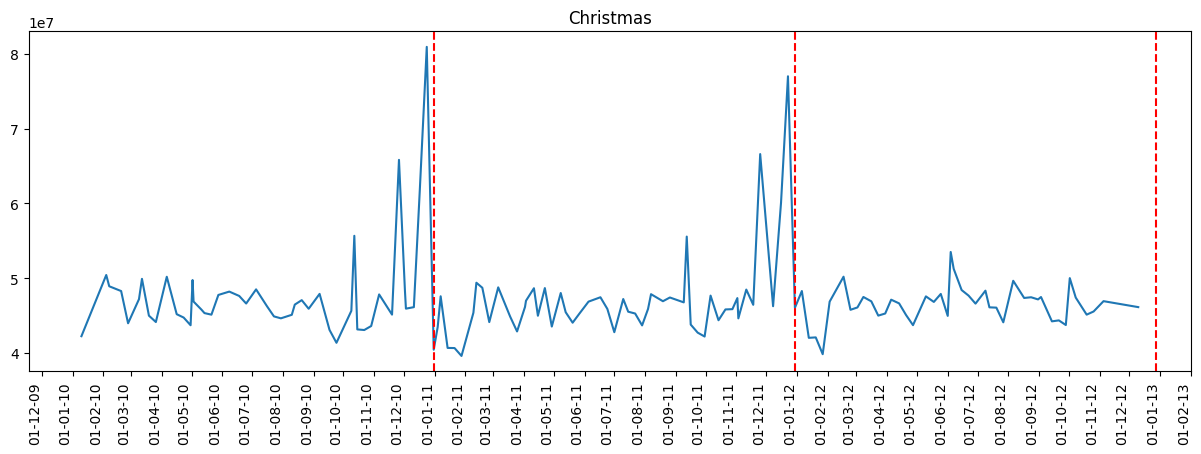

In [ ]:
from matplotlib import dates
from datetime import datetime

def plot_line(df,holiday_dates,holiday_label):
    fig, ax = plt.subplots(figsize = (15,5))  
    ax.plot(df['Date'],df['Weekly_Sales'],label=holiday_label)
    
    for day in holiday_dates:
        day = datetime.strptime(day, '%d-%m-%Y')
        plt.axvline(x=day, linestyle='--', c='r')
    

    plt.title(holiday_label)
    x_dates = df['Date'].dt.strftime('%Y-%m-%d').sort_values().unique()
    xfmt = dates.DateFormatter('%d-%m-%y')
    ax.xaxis.set_major_formatter(xfmt)
    ax.xaxis.set_major_locator(dates.DayLocator(1))
    plt.gcf().autofmt_xdate(rotation=90)
    plt.show()


total_sales = df.groupby('Date')['Weekly_Sales'].sum().reset_index()
Super_Bowl = ['12-2-2010', '11-2-2011', '10-2-2012']
Labour_Day =  ['10-9-2010', '9-9-2011', '7-9-2012']
Thanksgiving =  ['26-11-2010', '25-11-2011', '23-11-2012']
Christmas = ['31-12-2010', '30-12-2011', '28-12-2012']
    
plot_line(total_sales,Super_Bowl,'Super Bowl')
plot_line(total_sales,Labour_Day,'Labour Day')
plot_line(total_sales,Thanksgiving,'Thanksgiving')
plot_line(total_sales,Christmas,'Christmas')

## Modelling

#### Preprocessing

In [ ]:
import pandas as pd

# df_new = pd.read_csv("df2_clean_supervised.csv")
df = pd.read_csv("https://raw.githubusercontent.com/hadiprasetiyo/dataset-data-mining/main/Walmart_Store_sales.csv")

df['Date'] =  pd.to_datetime(df['Date'])

df["Day"]= pd.DatetimeIndex(df['Date']).day
df['Month'] = pd.DatetimeIndex(df['Date']).month
df['Year'] = pd.DatetimeIndex(df['Date']).year
df.head()

<ipython-input-18-b66874e97f5e>:6: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['Date'] =  pd.to_datetime(df['Date'])


,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Day,Month,Year
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106,2,5,2010
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106,2,12,2010
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,19,2,2010
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,26,2,2010
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106,3,5,2010


In [ ]:

df_new = pd.get_dummies(df.drop(columns=['Date']))


In [ ]:
df_new.head()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Day,Month,Year
0,1,1643690.90,0,42.31,2.572,211.096358,8.106,2,5,2010
1,1,1641957.44,1,38.51,2.548,211.242170,8.106,2,12,2010
2,1,1611968.17,0,39.93,2.514,211.289143,8.106,19,2,2010
3,1,1409727.59,0,46.63,2.561,211.319643,8.106,26,2,2010
4,1,1554806.68,0,46.50,2.625,211.350143,8.106,3,5,2010


#### Splitting

In [ ]:
from sklearn.model_selection import train_test_split

X = df_new.drop(columns=['Weekly_Sales'])
y = df_new['Weekly_Sales']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [ ]:
X

,Store,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Day,Month,Year
0,1,0,42.31,2.572,211.096358,8.106,2,5,2010
1,1,1,38.51,2.548,211.242170,8.106,2,12,2010
2,1,0,39.93,2.514,211.289143,8.106,19,2,2010
3,1,0,46.63,2.561,211.319643,8.106,26,2,2010
4,1,0,46.50,2.625,211.350143,8.106,3,5,2010
...,...,...,...,...,...,...,...,...,...
6430,45,0,64.88,3.997,192.013558,8.684,28,9,2012
6431,45,0,64.89,3.985,192.170412,8.667,10,5,2012
6432,45,0,54.47,4.000,192.327265,8.667,10,12,2012
6433,45,0,56.47,3.969,192.330854,8.667,19,10,2012


In [ ]:
y

0       1643690.90
1       1641957.44
2       1611968.17
3       1409727.59
4       1554806.68
           ...    
6430     713173.95
6431     733455.07
6432     734464.36
6433     718125.53
6434     760281.43
Name: Weekly_Sales, Length: 6435, dtype: float64

#### Modelling 

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# inisialisasi model decision tree dengan algoritma C4.5
clf = DecisionTreeClassifier(criterion='entropy')

# melatih model dengan data training
clf.fit(X_train, y_train)

# melakukan prediksi dengan data testing
y_pred = clf.predict(X_test)

# menghitung akurasi dari model
accuracy = accuracy_score(y_test, y_pred)
print("Akurasi C45: {:.2f}%".format(accuracy*100))



ValueError: ignored

In [ ]:
import pandas as pd
import numpy as np

# normalisasi data
X = (X - np.mean(X, axis=0)) / np.std(X, axis=0)

# split dataset menjadi training dan testing


# fungsi untuk menghitung jarak euclidean antara dua data
def euclidean_distance(data1, data2):
    return np.sqrt(np.sum(np.power(data1 - data2, 2)))

# fungsi untuk mencari k-nearest neighbors
def get_neighbors(X_train, y_train, x_test, k):
    distances = []
    for i in range(len(X_train)):
        distance = euclidean_distance(x_test, X_train[i])
        distances.append((i, distance))
    distances.sort(key=lambda x: x[1])
    neighbors = []
    for i in range(k):
        neighbors.append((y_train[distances[i][0]], distances[i][1]))
    return neighbors

# fungsi untuk melakukan prediksi
def predict(X_train, y_train, x_test, k):
    neighbors = get_neighbors(X_train, y_train, x_test, k)
    classes = {}
    for i in range(len(neighbors)):
        response = neighbors[i][0]
        if response in classes:
            classes[response] += 1
        else:
            classes[response] = 1
    sorted_classes = sorted(classes.items(), key=lambda x: x[1], reverse=True)
    return sorted_classes[0][0]

# fungsi untuk melakukan prediksi pada data testing
def k_nearest_neighbors(X_train, y_train, X_test, k):
    predictions = []
    for i in range(len(X_test)):
        predictions.append(predict(X_train, y_train, X_test[i], k))
    return predictions

# mencoba algoritma dengan k=3
predictions = k_nearest_neighbors(X_train, y_train, X_test, k=3)

# menghitung akurasi dari model
accuracy = sum(predictions == y_test) / len(y_test) * 100
print("Akurasi KNN: {:.2f}%".format(accuracy))



In [ ]:
# menghitung probabilitas prior
class_prob = {}
for label in set(y_train):
    class_prob[label] = len(y_train[y_train==label])/len(y_train)

# menghitung probabilitas likelihood
feature_prob = {}
for label in set(y_train):
    class_features = {}
    X_class = X_train[y_train == label]
    for i in range(X_train.shape[1]):
        feature_values = set(X_train[:, i])
        feature_probabilities = {}
        for value in feature_values:
            numerator = len(X_class[X_class[:, i] == value]) + 1e-8
            denominator = len(X_class) + len(feature_values) * 1e-8
            feature_probabilities[value] = numerator / denominator
        class_features[i] = feature_probabilities
    feature_prob[label] = class_features

# melakukan prediksi pada data test
y_pred = []
for x in X_test:
    class_scores = {}
    for label in set(y_train):
        class_probability = class_prob[label]
        feature_probabilities = feature_prob[label]
        log_likelihood = 0
        for i, value in enumerate(x):
            if value in feature_probabilities[i]:
                log_likelihood += np.log(feature_probabilities[i][value])
        class_scores[label] = np.log(class_probability) + log_likelihood
    predicted_class = max(class_scores, key=class_scores.get)
    y_pred.append(predicted_class)

# menghitung akurasi prediksi
accuracy = accuracy_score(y_test, y_pred)
print("Akurasi Naive Bayes: {:.2%}".format(accuracy))



## Evaluation

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# ...

# Evaluasi akurasi
accuracy = accuracy_score(y_test, y_pred)
print("Akurasi:", accuracy)

# Evaluasi precision, recall, dan f1-score
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)

# # Evaluasi ROC AUC Score
# roc_auc = roc_auc_score(y_test, y_pred, multi_class='ovo', average='weighted')
# print("ROC AUC Score:", roc_auc)


## Deployment

# CRISP-DM (Unsupervised Learning)

## Analisis Sosial Ekonomi Negara-Negara di Seluruh Dunia Menggunakan Data Mining: Menemukan Pola dan Faktor Kunci yang Mempengaruhi Kesejahteraan Negara


## Bussines Understanding:

Goals 

Dataset tersebut merupakan data yang berkaitan dengan beberapa indikator sosial ekonomi dari berbagai negara di dunia. Dataset ini dapat digunakan untuk melakukan analisis dan penelitian dalam berbagai bidang, seperti ekonomi, sosial, politik, atau pendidikan. Beberapa indikator yang terdapat dalam dataset ini antara lain adalah tingkat harapan hidup, PDB per kapita, indeks kebahagiaan, tingkat pengangguran, dan indeks pembangunan manusia.

Data ini dapat digunakan oleh para peneliti atau analis untuk memahami perbedaan sosial ekonomi antar negara, serta untuk mengidentifikasi faktor-faktor yang mempengaruhi kesejahteraan masyarakat di suatu negara. Hal ini dapat membantu pemerintah atau organisasi internasional untuk mengambil kebijakan atau melakukan program-program yang dapat meningkatkan kesejahteraan dan pembangunan di negara-negara tersebut. Selain itu, data ini juga dapat digunakan untuk mengidentifikasi tren atau pola dalam hubungan antara indikator sosial ekonomi yang berbeda, sehingga dapat membantu dalam peramalan atau prediksi masa depan.

Tujuan Penggunaan Data Mining

Identifikasi kelompok negara yang memiliki karakteristik atau profil sosial ekonomi yang serupa, sehingga dapat membantu dalam perumusan kebijakan atau strategi untuk meningkatkan kesejahteraan di kelompok negara tersebut.


## Data Understanding

##### Collecting Data

In [ ]:
import pandas as pd

# Disini kita akan melakukan collecting data dari dataset yang ada, lalu kita jadikan dataframe menggunakan library pandas
df2 = pd.read_csv("https://raw.githubusercontent.com/hadiprasetiyo/dataset-data-mining/main/Country-data.csv")

df2 

##### Describe Data

In [ ]:
df2.describe()

1. count: menunjukkan jumlah nilai non-null dalam setiap kolom dataset.

2. mean: menunjukkan nilai rata-rata dari setiap kolom dataset.

3. std: menunjukkan standar deviasi dari setiap kolom dataset.

4. min: menunjukkan nilai minimum dari setiap kolom dataset.

5. 25%: menunjukkan kuartil pertama dari setiap kolom dataset, kuartil pertama adalah nilai yang membagi dataset menjadi dua bagian yang sama besar.

6. 50%: menunjukkan kuartil kedua dari setiap kolom dataset, kuartil kedua atau median adalah nilai tengah dari dataset.

7. 75%: menunjukkan kuartil ketiga dari setiap kolom dataset, kuartil ketiga adalah nilai yang membagi dataset menjadi dua bagian yang sama besar.

8. max: menunjukkan nilai maksimum dari setiap kolom dataset.

In [ ]:
df2.shape

In [ ]:
df2.info()

country: Nama negara.
child_mort: Jumlah kematian anak di bawah usia lima tahun per 1000 kelahiran hidup.
exports: Persentase ekspor dari total output barang dan jasa.
health: Total pengeluaran kesehatan per kapita.
imports: Persentase impor dari total output barang dan jasa.
income: Pendapatan kotor per kapita dalam US dollar.
inflation: Tingkat inflasi tahunan.
life_expec: Rata-rata harapan hidup pada saat lahir.
total_fer: Rata-rata jumlah anak yang akan dilahirkan per wanita.
gdpp: Produk Domestik Bruto (PDB) per kapita dalam US dollar.

In [ ]:
df2.corr(numeric_only=True)

Output di atas adalah informasi mengenai korelasi pada DataFrame yang telah dibaca

## Eksplore Data

Code pertama digunakan untuk membuat pairplot dengan variabel 'child_mort', 'income', 'life_expec', dan 'gdpp'. vars digunakan untuk mengatur variabel yang ingin ditampilkan dalam pairplot.

Sedangkan code kedua juga digunakan untuk membuat pairplot dengan variabel yang sama, namun dengan menambahkan diag_kws dan plot_kws. diag_kws digunakan untuk mengatur properti pada diagonal pairplot, yaitu histogram dari setiap variabel. Pada code tersebut, properti color diatur menjadi 'orange' dan alpha diatur menjadi 0.7. Sedangkan plot_kws digunakan untuk mengatur properti pada scatter plot yang menampilkan hubungan antar variabel. Pada code tersebut, properti alpha diatur menjadi 0.7 untuk menampilkan scatter plot dengan transparansi yang lebih rendah.

Dengan menggunakan pairplot, kita dapat melihat hubungan antara setiap variabel dalam dataset dan memperoleh wawasan yang lebih baik tentang karakteristik sosial ekonomi dari negara-negara dalam dataset. Selain itu, kita juga dapat melihat adanya pola hubungan atau korelasi antar variabel dan melihat apakah ada variabel yang mempengaruhi variabel lainnya.

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(df2['gdpp'], df2['income'])
plt.xlabel('GDP per capita')
plt.ylabel('Income')
plt.title('Scatter Plot of GDP per capita vs. Child Mortality')
plt.show()


In [ ]:
import seaborn as sns

sns.heatmap(df2.corr(), annot=True, cmap='coolwarm')



In [ ]:
import seaborn as sns

sns.pairplot(df2, vars=['child_mort', 'income', 'life_expec', 'gdpp'])

sns.pairplot(df2, vars=['child_mort', 'income', 'life_expec', 'gdpp'],
             diag_kws={'color': 'orange', 'alpha': 0.7},
             plot_kws={'alpha': 0.7})


In [ ]:
df2[df2.duplicated()]

##### Handling Outlier

In [ ]:
def outlier(col):
    Q1 = df2[col].quantile(0.25) # Mengetahui mana yang quartile 1
    Q3 = df2[col].quantile(0.75) # Mengetahui mana yang quartile 3
    IQR = Q3 - Q1 # Simpangan Quartile (q3-q1)    
    return df2[(df[col]> Q3 +1.5*IQR)  | (df2[col]< Q1-1.5*IQR )]

In [ ]:
outlier('life_expec')

In [ ]:
outlier('income')

In [ ]:
outlier('gdpp')

## Data Preparation

Data Transformation

Select Data

In [ ]:
df2.sample(5)

#### Missing Value Check

In [ ]:
df2.isna().sum()

#### Bivariate Analysis

In [ ]:
df2.groupby("inflation").describe()

In [ ]:
# membuat variabel baru untuk dataset yang sudah di-update
df2 = df2.drop(['exports','inflation', 'health', 'total_fer', 'imports'], axis=1)


In [ ]:
import plotly.express as px

df2_corr = pd.get_dummies(df2).corr()

px.imshow(df2_corr)

## Modelling

###### Preprocessing

In [ ]:
# Untuk Clustering
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering,KMeans,AffinityPropagation,Birch

# Untuk scalling dan normalisasi
from sklearn.preprocessing import StandardScaler

# Metric Pengukuran
# sumber : https://towardsdatascience.com/performance-metrics-in-machine-learning-part-3-clustering-d69550662dc6
from sklearn.metrics import silhouette_score,calinski_harabasz_score,davies_bouldin_score


In [ ]:
# PreProcessing
# Encoding DataTraining
X_train = pd.get_dummies(df2,drop_first=True)

In [ ]:
# Creating a class to handle clustering
class Cluster:
    
    # Pada constructor terjadi beberapa proses
    # 1. Membuat normalisasi data
    
    def __init__(self,train):
        self.train = train
        self.scaled = StandardScaler().fit_transform(self.train)
        self.clusters = None
        self.name = None
        self._label = None

    # Method apply adalah fungsi kedua yang harus dijalankan
    # Method apply akan menerima argumen tambahan sebagai argumen untuk 
    # algoritma cluster yang akan digunakan
    def apply(self,cluster_algo,**kwargs):
        agg_cluster = cluster_algo(**kwargs)


        self.clusters = agg_cluster.fit(self.scaled) #Set Value
        self._label = self.clusters.labels_ #Set value

        # Mengambil nama algoritma clusternya
        self.name = type(self.clusters).__name__

        return self
    
    # Df untuk membuat dataframe
    def df2(self,normalized=False):

        if normalized:
            X = pd.DataFrame(self.scaled,columns=self.train.columns)
        else:
            X = self.train.copy(deep=True)
        
        X["Cluster"] = self._label
        X["Cluster"] = X['Cluster'].astype(object)

        return X
    # Untuk Mendapatkan cluster ke N
    def get_cluster(self,n,normalized=False):
        df2 = self.df2(normalized)
        
        return df2[df2["Cluster"] == n]

    # Plot untuk membuat scatterplot 
    def plot(self,X,Y,normalized=False):
        return px.scatter(self.df2(normalized), x=X, y=Y, color="Cluster")

    # Plot 3d untuk membuat scatterplot 3d
    def plot_3d(self,X,Y,Z,normalized=False):
        return px.scatter_3d(self.df2(normalized), x=X, y=Y,z=Z, color="Cluster")

    # menggunakan decorator property untuk mengonversi method menjadi property
    @property
    def metric(self): #Method ini berfungsi untuk mengambil hasil pengukuran berdasrkan metric ...
        label = self._label
        # Ini metric yang digunakan 'silhouette_score', 'calinski_harabasz_score', 'davies_bouldin_score'
        
        return [silhouette_score(self.scaled,label),davies_bouldin_score(self.scaled,label),calinski_harabasz_score(self.scaled,label)]

In [ ]:
sse = [] #Daftar SSE
K = range(1,30) #Banyak Cluster hingga 30
# Perulangan hingga 30 Cluster
for k in K:
    kmeans = KMeans(n_clusters= k,random_state=42).fit(X_train)
    #Mendapatkan SSE dan append ke list sse
    sse.append(kmeans.inertia_)

# Membuat plot K terhadap SSE
plt.plot(K,sse, "bx-")


##### Modelling

In [ ]:
# Pertama-tama kita perlu menerapkan algoritma KMeans kedalam kelas Cluster
kmeans = Cluster(X_train).apply(KMeans,n_clusters=5,random_state=42) #n_cluster adalah banyak clusternya

In [ ]:
# Untuk menampilkan dataframe 
kmeans.df2().head()

In [ ]:
# Menampilkan plot berdasarkan dataframe dan 3 variabel x,y,z
kmeans.plot_3d("income","life_expec","gdpp")

In [ ]:
# Algorita yang dipakai
algo = [kmeans]

# Untuk menampung hasil metrik (bentuk list dari list metrics ini adalah nested list)
metrics = [i.metric for i in algo]

# Nama dari setiap algo menjadi indexnya
index = [i.name for i in algo]

# Penamaan Kolmnya
df_metric = pd.DataFrame(metrics, index=index, columns=['silhouette_score', 'calinski_harabasz_score', 'davies_bouldin_score'])

def _color_green(df):
      return 'background-color: green; color:white'


In [ ]:
df_metric.style.applymap(_color_green)

#### Analisis Cluster

In [ ]:
# Pertama kita perlu membuat fungsi plot untuk plotting cluster
def plot_cluster(cluster_df):
    plot, ax = plt.subplots(2,4,figsize=(30,7),constrained_layout = True)
    sns.countplot(data=cluster_df,x="income",ax=ax[1][3])
    for i,col in enumerate(cols):
        sns.histplot(data=cluster_df,x=col,ax=ax[0][i],kde=True)
        sns.boxplot(data=cluster_df,x=col,ax=ax[1][i])

In [ ]:
cols = ["income","child_mort","gdpp"]

In [ ]:
cluster1 = kmeans.get_cluster(0)
cluster2 = kmeans.get_cluster(1)
cluster3 = kmeans.get_cluster(2)
cluster4 = kmeans.get_cluster(3)
cluster5 = kmeans.get_cluster(4)


In [ ]:
cluster1.head()

In [ ]:
cluster3.head()

In [ ]:
plot_cluster(cluster1)


In [ ]:
plot_cluster(cluster2)


## Deployment